In [1]:
import mglearn
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mglearn.datasets import make_blobs
from sklearn.datasets import load_digits
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix, accuracy_score

In [2]:
digits = load_digits()
y = digits.target == 9

In [3]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [4]:
dummy_majority = DummyClassifier(strategy='most_frequent').fit(x_train, y_train)
pred_most_frequent = dummy_majority.predict(x_test)
print('예측된 유니크 레이블 : {}'.format(np.unique(pred_most_frequent)))
print('테스트 점수 : {:.2f}'.format(dummy_majority.score(x_test, y_test)))

예측된 유니크 레이블 : [False]
테스트 점수 : 0.90


In [5]:
tree = DecisionTreeClassifier(max_depth=2).fit(x_train, y_train)
pred_tree = tree.predict(x_test)
print('테스트 점수 : {:.2f}'.format(tree.score(x_test, y_test)))

테스트 점수 : 0.92


In [6]:
dummy = DummyClassifier().fit(x_train, y_train)
pred_dummy = dummy.predict(x_test)
print('dummy 점수 : {:.2f}'.format(dummy.score(x_test, y_test)))

dummy 점수 : 0.84


In [7]:
lr = LogisticRegression(C=0.1).fit(x_train, y_train)
pred_lr = lr.predict(x_test)
print('logreg 점수 : {:.2f}'.format(lr.score(x_test, y_test)))

logreg 점수 : 0.98


In [8]:
confusion = confusion_matrix(y_test, pred_lr)
print('오차 행렬 : \n{}'.format(confusion))

오차 행렬 : 
[[402   1]
 [  6  41]]


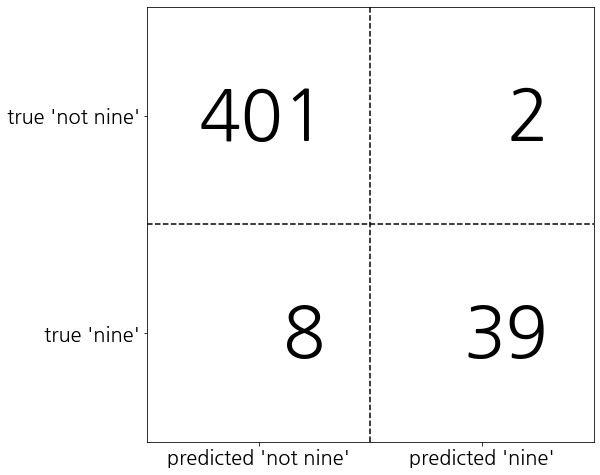

In [9]:
mglearn.plots.plot_confusion_matrix_illustration()

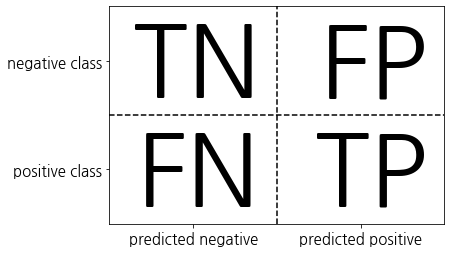

In [10]:
mglearn.plots.plot_binary_confusion_matrix()

In [11]:
print('빈도 기반 더미 모델 : ')
print(confusion_matrix(y_test, pred_most_frequent))
print('\n무작위 더미 모델 : ')
print(confusion_matrix(y_test, pred_dummy))
print('\n결정 트리 : ')
print(confusion_matrix(y_test, pred_tree))
print('\n로지스틱 회귀 : ')
print(confusion_matrix(y_test, pred_lr))

빈도 기반 더미 모델 : 
[[403   0]
 [ 47   0]]

무작위 더미 모델 : 
[[358  45]
 [ 42   5]]

결정 트리 : 
[[390  13]
 [ 24  23]]

로지스틱 회귀 : 
[[402   1]
 [  6  41]]


In [12]:
print('빈도 기반 더미 모델의 f1 score : {:.2f}'.format(f1_score(y_test, pred_most_frequent)))
print('\n무작위 더미 모델의 f1 score : {:.2f}'.format(f1_score(y_test, pred_dummy)))
print('\n결정 트리 모델의 f1 score : {:.2f}'.format(f1_score(y_test, pred_tree)))
print('\n로지스틱 회귀 모델의 f1 score : {:.2f}'.format(f1_score(y_test, pred_lr)))

빈도 기반 더미 모델의 f1 score : 0.00

무작위 더미 모델의 f1 score : 0.10

결정 트리 모델의 f1 score : 0.55

로지스틱 회귀 모델의 f1 score : 0.92


In [13]:
print(classification_report(y_test, pred_most_frequent, target_names=['9 아님', '9']))

              precision    recall  f1-score   support

        9 아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [14]:
print(classification_report(y_test, pred_dummy, target_names=['9 아님', '9']))

              precision    recall  f1-score   support

        9 아님       0.90      0.89      0.89       403
           9       0.10      0.11      0.10        47

    accuracy                           0.81       450
   macro avg       0.50      0.50      0.50       450
weighted avg       0.81      0.81      0.81       450



In [15]:
print(classification_report(y_test, pred_tree, target_names=['9 아님', '9']))

              precision    recall  f1-score   support

        9 아님       0.94      0.97      0.95       403
           9       0.64      0.49      0.55        47

    accuracy                           0.92       450
   macro avg       0.79      0.73      0.75       450
weighted avg       0.91      0.92      0.91       450



In [16]:
print(classification_report(y_test, pred_lr, target_names=['9 아님', '9']))

              precision    recall  f1-score   support

        9 아님       0.99      1.00      0.99       403
           9       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



In [17]:
x, y = make_blobs(n_samples=(400, 50), centers=2, cluster_std=[7.0, 2], random_state=22)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
svc = SVC(gamma=.05).fit(x_train, y_train)

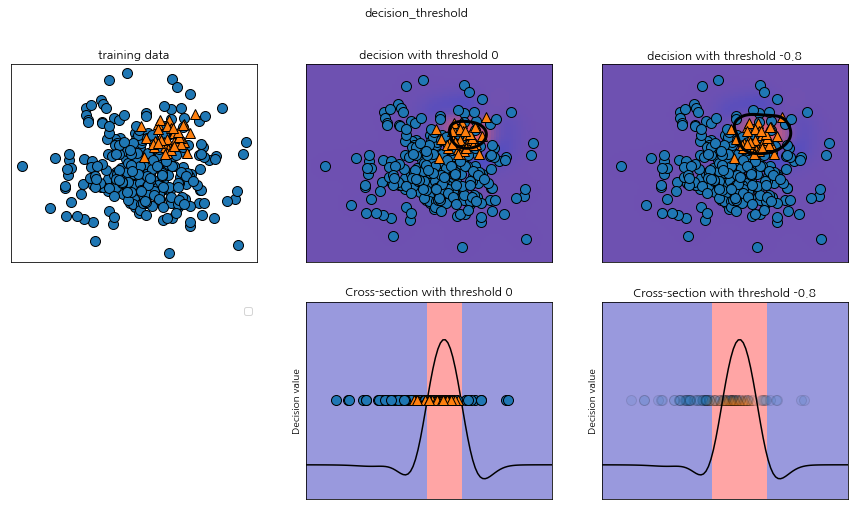

In [18]:
mglearn.plots.plot_decision_threshold()

In [19]:
print(classification_report(y_test, svc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [20]:
y_pred_lower_threshold = svc.decision_function(x_test) > -.8

In [21]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



In [22]:
x, y = make_blobs(n_samples=(4000, 500), centers=2, cluster_std=[7.0, 2], random_state=22)
x_train , x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [23]:
svc = SVC(gamma=.05).fit(x_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(x_test))

Text(0, 0.5, '재현율')

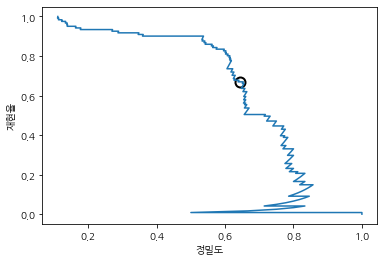

In [24]:
close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='임계값 0', 
         fillstyle='none', c='k', mew=2)
plt.plot(precision, recall, label='정밀도-재현율 곡선')
plt.xlabel('정밀도')
plt.ylabel('재현율')

In [25]:
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [26]:
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(x_test)[:, 1])

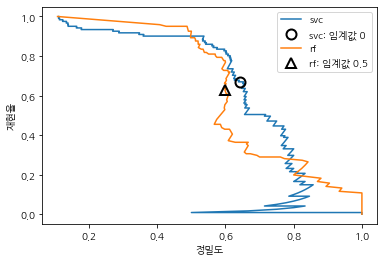

In [27]:
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))

plt.plot(precision, recall, label='svc')
plt.plot(precision[close_zero], recall[close_zero], 'o', c='k', markersize=10, 
         label='svc: 임계값 0', fillstyle='none', mew=2)

plt.plot(precision_rf, recall_rf, label='rf')
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k', markersize=10, 
         label='rf: 임계값 0.5', fillstyle='none', mew=2)
plt.xlabel('정밀도')
plt.ylabel('재현율')
plt.legend(loc='best')

In [28]:
print('랜덤 포레스트의 f1_score : {:.3f}'.format(f1_score(y_test, rf.predict(x_test))))
print('svc의 f1_score : {:.3f}'.format(f1_score(y_test, svc.predict(x_test))))

랜덤 포레스트의 f1_score : 0.610
svc의 f1_score : 0.656


In [29]:
ap_rf = average_precision_score(y_test, rf.predict_proba(x_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(x_test))
print('랜덤 포레스트의 평균 정밀도 : {:.3f}'.format(ap_rf))
print('svc의 평균 정밀도 : {:.3f}'.format(ap_svc))

랜덤 포레스트의 평균 정밀도 : 0.660
svc의 평균 정밀도 : 0.666


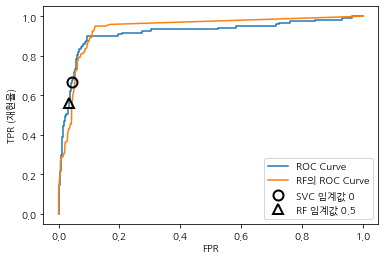

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(x_test))
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(x_test)[:, 1])

plt.plot(fpr, tpr, label='ROC Curve')
plt.plot(fpr_rf, tpr_rf, label='RF의 ROC Curve')

plt.xlabel('FPR')
plt.ylabel('TPR (재현율)')

close_zero = np.argmin(np.abs(thresholds))
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label='SVC 임계값 0', fillstyle='none', c='k', mew=2)
plt.plot(fpr[close_default_rf], tpr[close_default_rf], '^', markersize=10,
         label='RF 임계값 0.5', fillstyle='none', c='k', mew=2)
plt.legend(loc=4)

In [31]:
svc_auc = roc_auc_score(y_test, svc.decision_function(x_test))
rf_auc = roc_auc_score(y_test, rf.predict_proba(x_test)[:, 1])
print('SVC의 AUC : {:.3f}'.format(svc_auc))
print('랜덤 포레스트의 AUC : {:.3f}'.format(rf_auc))

SVC의 AUC : 0.916
랜덤 포레스트의 AUC : 0.937
